In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv")

In [19]:
df

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99
1958-06,1958.4548,317.27,315.15,-1,-9.99,-0.99
1958-07,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...
2024-05,2024.3750,426.90,423.63,29,0.76,0.27
2024-06,2024.4583,426.91,424.46,20,0.65,0.28
2024-07,2024.5417,425.55,425.09,24,0.69,0.27
2024-08,2024.6250,422.99,424.80,22,1.08,0.44


In [20]:
fields = ['Date', 'Interpolated']
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv", usecols = fields)
df.head(3)

,Date,Interpolated
1958-03,1958.2027,-1
1958-04,1958.2877,-1
1958-05,1958.3699,-1


In [21]:
names = ['Date', "DD", "Ave", "Interpolated", "Trend", "Num Days","extra"]
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv",header= None, names = names, skiprows=1)
df.head(3)

,Date,DD,Ave,Interpolated,Trend,Num Days,extra
0,1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


In [22]:

df["Date"]

0      1958-03
1      1958-04
2      1958-05
3      1958-06
4      1958-07
        ...   
794    2024-05
795    2024-06
796    2024-07
797    2024-08
798    2024-09
Name: Date, Length: 799, dtype: object

In [23]:
pd.to_datetime(df['Date'])

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
794   2024-05-01
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
Name: Date, Length: 799, dtype: datetime64[ns]

In [24]:
df["Date"]= pd.to_datetime(df['Date'])

In [25]:
df["Date"]

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
794   2024-05-01
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
Name: Date, Length: 799, dtype: datetime64[ns]

In [26]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Ave'>

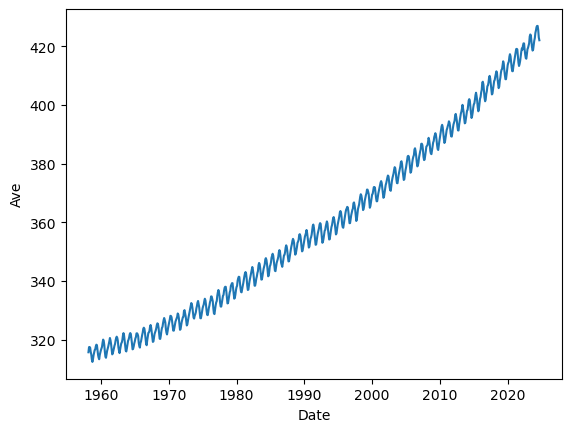

In [27]:
sns.lineplot(data = df, x = "Date", y = "Ave")

<Axes: xlabel='Date', ylabel='Ave'>

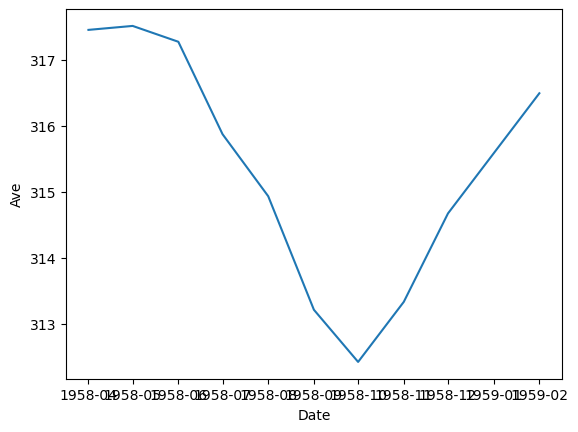

In [28]:
sns.lineplot(data = df.iloc[1:12], x = "Date", y = "Ave")

<Axes: xlabel='Date', ylabel='Interpolated'>

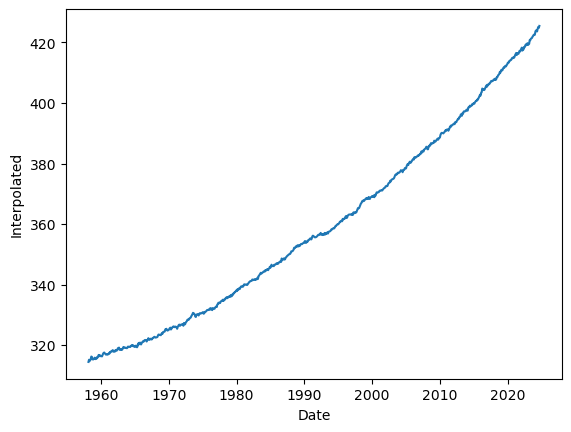

In [29]:
sns.lineplot(data=df, x="Date", y="Interpolated")

In [31]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)

In [32]:
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,


In [33]:
pd.to_datetime(df[["year", "month"]])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day] is missing

In [35]:
df["day"] =1
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1


In [36]:
df["date"] = pd.to_datetime(df[["year", "month", "day"]])
df["date"]

0     1996-08-01
1     1996-10-01
2     1996-11-01
3     1996-12-01
4     1997-01-01
         ...    
333   2024-06-01
334   2024-07-01
335   2024-08-01
336   2024-09-01
337   2024-10-01
Name: date, Length: 338, dtype: datetime64[ns]

<Axes: xlabel='date', ylabel='meant'>

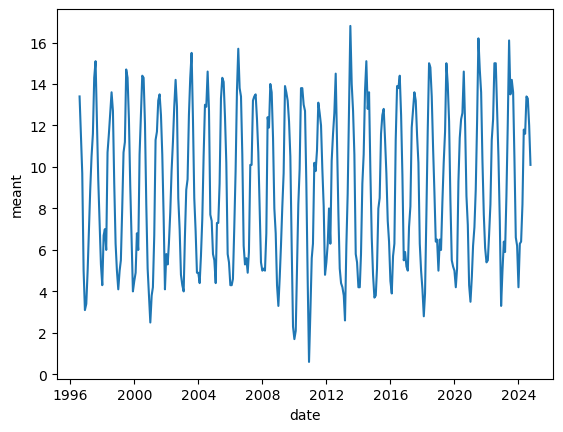

In [37]:
sns.lineplot(data=df, x="date", y="meant")

In [38]:
df.set_index("date", inplace = True)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1


In [39]:
df["meant"].resample("1d").mean()

date
1996-08-01    13.4
1996-08-02     NaN
1996-08-03     NaN
1996-08-04     NaN
1996-08-05     NaN
              ... 
2024-09-27     NaN
2024-09-28     NaN
2024-09-29     NaN
2024-09-30     NaN
2024-10-01    10.1
Freq: D, Name: meant, Length: 10289, dtype: float64